In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

##  Exploratory Precipitation Analysis

In [10]:
# Insepct Measurement table
inspector = inspect(engine)
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# data = engine.execute("SELECT * FROM measurement")

# for record in data:
#     print(record)

In [12]:
# session.query(Measurement.date).order_by(Measurement.date).all()

In [13]:
 # Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date[0]

'2017-08-23'

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

# datetime conversion

date_object = dt.datetime.strptime(recent_date[0], "%Y-%m-%d").date()


last12months = date_object - dt.timedelta(days=365)
print("Query Date: ", last12months)

Query Date:  2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
filter

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
conn= engine.connect()
prcp_scores = pd.read_sql("SELECT date, prcp \
                           FROM measurement WHERE date \
                           BETWEEN :date2 AND :date \
                           ORDER BY date;"
                           , conn, \
                           params={'date': recent_date[0], 'date2': last12months.strftime(format='%Y-%m-%d')})



prcp_scores

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [42]:
# Query the dates and temperature observations of the most active station for the last year of data.

# Return a JSON list of temperature observations (TOBS) for the previous year.

stations = session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.date>='2016-08-23', Measurement.date<='2017-08-23',\
               Measurement.station=='USC00519281')
for station in stations: 
    print(station)

('2016-08-23', 77.0)
('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)
('2016-08-28', 73.0)
('2016-08-29', 78.0)
('2016-08-30', 77.0)
('2016-08-31', 78.0)
('2016-09-01', 80.0)
('2016-09-02', 80.0)
('2016-09-03', 78.0)
('2016-09-04', 78.0)
('2016-09-05', 78.0)
('2016-09-06', 73.0)
('2016-09-07', 74.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 77.0)
('2016-09-11', 80.0)
('2016-09-12', 76.0)
('2016-09-13', 79.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 78.0)
('2016-09-17', 79.0)
('2016-09-18', 78.0)
('2016-09-19', 78.0)
('2016-09-20', 76.0)
('2016-09-21', 74.0)
('2016-09-22', 77.0)
('2016-09-23', 78.0)
('2016-09-24', 79.0)
('2016-09-25', 79.0)
('2016-09-26', 77.0)
('2016-09-27', 80.0)
('2016-09-28', 78.0)
('2016-09-29', 78.0)
('2016-09-30', 78.0)
('2016-10-01', 77.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04', 79.0)
('2016-10-05', 79.0)
('2016-10-06', 75.0)
('2016-10-07', 76.0)
('2016-10-08', 73.0)
('2016-10-09'

In [16]:
last12months.strftime(format='%Y-%m-%d')

'2016-08-23'

<AxesSubplot:xlabel='date'>

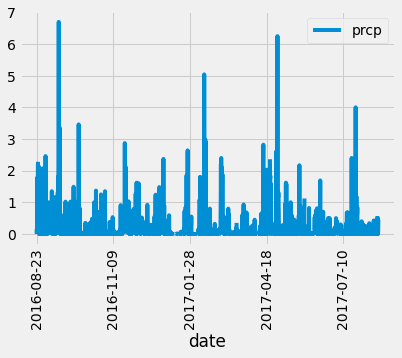

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_scores.plot(x='date', y='prcp', rot=90)


In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
aggregations = {
    'prcp': ['mean', 'median', 'var', 'std', 'sem']
}

prcp_summary = prcp_scores.agg(aggregations)
prcp_summary

,prcp
mean,0.177279
median,0.020000
var,0.212696
std,0.461190
sem,0.010259


## Station Analysis

In [19]:
# Insepct Station table
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [20]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [21]:
# data = engine.execute("SELECT * FROM station, measurement")

# for record in data:
#     print(record)

In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station))\
                 .group_by(Measurement.station)\
                 .order_by(func.count(Measurement.station).desc())    
for active in active_station:
    print(active)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Using the most active station id

query_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281')  
for query in query_station:
    print(f"tobs min: {query[0]}\
            tobs max: {query[1]}\
            tobs avg: {query[2]}")



tobs min: 54.0            tobs max: 85.0            tobs avg: 71.66378066378067


<AxesSubplot:ylabel='Frequency'>

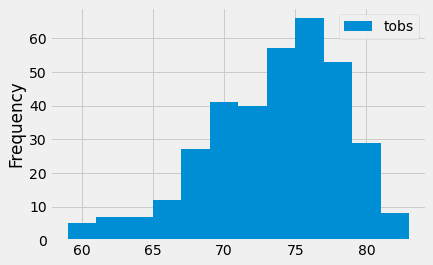

In [24]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Filter by the station with the highest number of observations.
# Query the last 12 months of temperature observation data for this station.
temp_observation = pd.read_sql("SELECT date, tobs \
                           FROM measurement \
                           WHERE date BETWEEN '2016-08-23' AND '2017-08-23' \
                           AND station = 'USC00519281' \
                           ORDER BY date;"
                           , conn)

# Plot the results as a histogram with bins=12.

bins = 12
temp_observation.plot.hist(bins = 12)



## Close Session

In [39]:
session.close()